In [1]:
# set up
import pandas as pd
import numpy as np
import pickle
import time 
import os
import matplotlib.pyplot as plt
import datetime
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.font_manager import FontProperties
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("ggplot")
data_folder_path = 'C:\\Users\\goodluck\\Desktop\\DB'
raw_data_path =  "C:\\Users\\goodluck\\Desktop\\DB\\raw_data"
storage_path =  "C:\\Users\\goodluck\\Desktop\\DB\\database_storage"
DTBS_path = os.path.join(storage_path, "DTBS.pkl")
font = FontProperties(fname=r"simsun.ttf", size=14)  
matplotlib.rcParams['axes.unicode_minus'] =False
mpl.rcParams['font.sans-serif'] = ['SimHei']
tick_spacing = 4

# re-open
with open(DTBS_path, 'rb') as f:  
    DTBS = pickle.load(f)
    
# helper -- days
def select_days(s_d, e_d, wkd, gap):
    days = []
    flag = 0
    sdt = datetime.datetime.strptime(s_d, '%Y-%m-%d').date()
    edt = datetime.datetime.strptime(e_d, '%Y-%m-%d').date()
    for day in DTBS['D']['day']:
        cdt =  datetime.datetime.strptime(day, '%Y-%m-%d').date()
        if cdt >= sdt:
            flag = 1
        
        if cdt == edt:
            days.append(day)
            break
        
        if cdt > edt:
            break 
            
        if flag == 1:
            days.append(day)
            
    s_days = []
    count = 0
    for day in days:
        if day in DTBS['D'][wkd]:
            if count % gap == 0:
                s_days.append(day)
                
            count += 1
    
    
    return s_days

f20wm = select_days('2020-01-01', '2020-06-30', 'mon', 1)
f20fm = select_days('2020-01-01', '2020-06-30', 'mon', 2)
f20mm = select_days('2020-01-01', '2020-06-30', 'mon', 4)
s20wm = select_days('2020-07-01', '2020-12-31', 'mon', 1)
s20fm = select_days('2020-07-01', '2020-12-31', 'mon', 2)
s20mm = select_days('2020-07-01', '2020-12-31', 'mon', 4)
f21wm = select_days('2021-01-01', '2021-06-30', 'mon', 1)
f21fm = select_days('2021-01-01', '2021-06-30', 'mon', 2)
f21mm = select_days('2021-01-01', '2021-06-30', 'mon', 4)
s21wm = select_days('2021-07-01', '2021-12-31', 'mon', 1)
s21fm = select_days('2021-07-01', '2021-12-31', 'mon', 2)
s21mm = select_days('2021-07-01', '2021-12-31', 'mon', 4)
f22wm = select_days('2022-01-01', '2022-06-30', 'mon', 1)
f22fm = select_days('2022-01-01', '2022-06-30', 'mon', 2)
f22mm = select_days('2022-01-01', '2022-06-30', 'mon', 4)
s22wm = select_days('2022-07-01', '2022-12-31', 'mon', 1)
s22ww = select_days('2022-07-01', '2022-12-31', 'wed', 1)
s22fm = select_days('2022-07-01', '2022-12-31', 'mon', 2)
s22mm = select_days('2022-07-01', '2022-12-31', 'mon', 4)
f23wm = select_days('2023-01-01', '2023-04-17', 'mon', 1)
f23fm = select_days('2023-01-01', '2023-04-17', 'mon', 2)
f23mm = select_days('2023-01-01', '2023-04-17', 'mon', 4)
f23ww = select_days('2023-01-01', '2023-04-19', 'wed', 1)
f23mm.append('2023-04-10')
a20wm = select_days('2020-01-01', '2020-12-31', 'mon', 1)
a20fm = select_days('2020-01-01', '2020-12-31', 'mon', 2)
a20mm = select_days('2020-01-01', '2020-12-31', 'mon', 4)
a21wm = select_days('2021-01-01', '2021-12-31', 'mon', 1)
a21fm = select_days('2021-01-01', '2021-12-31', 'mon', 2)
a21mm = select_days('2021-01-01', '2021-12-31', 'mon', 4)
a22wm = select_days('2022-01-01', '2022-12-31', 'mon', 1)
a22fm = select_days('2022-01-01', '2022-12-31', 'mon', 2)
a22mm = select_days('2022-01-01', '2022-12-31', 'mon', 4)

a22wm = select_days('2022-01-01', '2022-12-31', 'mon', 1)
a22wt = select_days('2022-01-01', '2022-12-31', 'tue', 1)
a22ww = select_days('2022-01-01', '2022-12-31', 'wed', 1)
a22wh = select_days('2022-01-01', '2022-12-31', 'thu', 1)
a22wf = select_days('2022-01-01', '2022-12-31', 'fri', 1)



hywm = [f20wm, s20wm, f21wm, s21wm, f22wm, s22ww, f23ww]
hyfm = [f20fm, s20fm, f21fm, s21fm, f22fm, s22fm, f23fm]
hymm = [f20mm, s20mm, f21mm, s21mm, f22mm, s22mm, f23mm]
test = ['2023-04-12','2023-04-19']

# helper -- others

def sharpe(profit):
    avg_rate = np.mean(profit)
    std_rate = np.std(profit)
    Sharpe_Ratio = (avg_rate * 52 -0.028397) / (std_rate * sqrt(52))
    return(Sharpe_Ratio)


def down(profit):
    return_list = [i+1 for i in profit]
    i = np.argmax((np.maximum.accumulate(return_list) - return_list))
    if i == 0:
        return 0
    j = np.argmax(return_list[:i])  # 开始位置
    drawdown_rate = (return_list[j] - return_list[i]) / return_list[j]
    return drawdown_rate


def vola(profit):
    log_return_list = [log(i+1) for i in profit]
    Volatility = std(log_return_list) / sqrt(5)
    annualVolatility = Volatility * sqrt(252) 
    return annualVolatility


def select_group(nm, dt, codes, grp):
    select = []
    if nm == 'id':
        for code in codes:
            if DTBS['B'][code]['cat1'] == grp:
                select.append(code)
    elif nm == 'pr':
        for code in codes:
            if DTBS['A'][code][dt]['dp'] >= grp[0] and DTBS['A'][code][dt]['dp'] <= grp[1]:
                select.append(code)
                
    else:
        for code in codes:
            if DTBS['B'][code]['cat1']  == grp[0]:
                if DTBS['A'][code][dt]['dp'] >= grp[1][0] and DTBS['A'][code][dt]['dp'] <= grp[1][1]:
                    select.append(code)
    return select


def transform_group(grps):
    if len(grps) == 1:
        return grps[0]
    else:
        grp = ['idpr', []]
        for cd1 in grps[0][1]:
            for cd2 in grps[1][1]:
                grp[1].append((cd1, cd2))
        
        return grp
    
def ipo(codes, dt):
    exist = []
    for code in codes:
        if datetime.datetime.strptime(DTBS['B'][code]['ipo'], '%Y-%m-%d') >= (datetime.datetime.strptime(dt, '%Y-%m-%d') + datetime.timedelta(days=-180)):
            exist.append(code)
             
    return exist
    
def select_existing(dt):
    exist = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            exist.append(code)
            
    return exist

def get_prcs(code, dts):
    prc = []
    for dt in dts:
        prc.append(DTBS['A'][code][dt]['dp'])
    prc.sort()
    return prc
    
def relative_low(lst, pos):
    return np.quantile(a=lst, q = pos)
    
def absolute_low(lst, pos):
    return min(lst) + pos * (max(lst) - min(lst))

def low_prc(code, dt, lm, pos):
    prc = get_prcs(code, lm)
#     lp = min([relative_low(prc, pos), absolute_low(prc, pos)])
    lp = absolute_low(prc, pos)
    tp = DTBS['A'][code][dt]['dp']
#     if (tp <= lp):
#         print(code, tp, lp)
#     if tp <= lp:
#         print(tp, lp)
    return tp <= lp

def calculate_time(dt, d, l):
    time = []
    days = DTBS['D']['day']
    if d == 'p':
        for i in range(len(days)):
            if days[i] == dt:
                break
                
    return days[i-l+1:i+1]
            
def select_condition(codes, dt, fcd):
    satisfy = []
    if fcd[0] == 'lp':
        lm = calculate_time(dt, 'p', 20)
        
        for code in codes:
            if low_prc(code, dt, lm, fcd[1]):
                satisfy.append(code)
    elif len(fcd) == 1:
        return ipo(codes, dt)
        
    else:
        for code in codes:
            if DTBS['A'][code][dt][fcd[0]] <= fcd[2] and DTBS['A'][code][dt][fcd[0]] >= fcd[1]:
                satisfy.append(code)
                    
    return satisfy

def takeSecond(elem):
    return elem[1]


def retrieve_low_nodes(codes,dt,num):
    dl_rank = []
    for code in codes:
        if DTBS['A'][code][dt]['dl'] != 999:
            dl_rank.append((code, DTBS['A'][code][dt]['dl']))
    
    dl_rank.sort(key=takeSecond)
    low = dl_rank[0:num]
    return [i[0] for i in low]

def rank(codes, dt, idx, num, d):
    rk = []
    if num == -1:
        num = len(codes)
    for code in codes:
        if idx == 'lp':
            if not np.isnan(DTBS['A'][code][dt]['dp']):
                lm = calculate_time(dt, 'p', 20)
                prc = get_prcs(code, lm)
                lp = absolute_low(prc, 0)
                rk.append((code, DTBS['A'][code][dt]['dp']/lp))
            
            
        elif idx != 'dl':
            if not np.isnan(DTBS['A'][code][dt][idx]):
                rk.append((code, DTBS['A'][code][dt][idx]))
        else:
            if not np.isnan(DTBS['A'][code][dt][idx]):
                if DTBS['A'][code][dt][idx] != 999:
                    rk.append((code, DTBS['A'][code][dt][idx]))
    if num >= len(rk):
        num = len(rk)
        
     
#     reverse = True 降序
    if d == 'd':
        rk.sort(key=takeSecond, reverse = True)
    else:
        rk.sort(key=takeSecond, reverse = False)

    if idx == 'lp':
        lp = [i for i in rk if i[1] == 1.0]
        ot = []
        if num - len(lp) > 0:
            ot = rk[len(lp):num]
        
        low = lp + ot
        
    else:    
        low = rk[0:num]
#     print("In",dt , len(low), "of", len(codes),  "is selected")   

#     print(low)
    
    
    return [i[0] for i in low]
        
    
idts = [['农林牧渔(2021)', '基础化工(2021)', '美容护理(2021)', '通信(2021)', '非银金融(2021)', '电力设备(2021)', '汽车(2021)', '电子(2021)'], ['家用电器(2021)', '基础化工(2021)', '建筑材料(2021)', '建筑装饰(2021)', '机械设备(2021)', '商贸零售(2021)', '计算机(2021)', '国防军工(2021)', '钢铁(2021)', '传媒(2021)'], ['汽车(2021)', '交通运输(2021)', '农林牧渔(2021)', '煤炭(2021)', '有色金属(2021)', '商贸零售(2021)', '机械设备(2021)', '钢铁(2021)', '电力设备(2021)', '基础化工(2021)'], ['电力设备(2021)', '有色金属(2021)', '交通运输(2021)', '钢铁(2021)', '通信(2021)', '汽车(2021)', '基础化工(2021)', '轻工制造(2021)', '国防军工(2021)', '医药生物(2021)'], ['有色金属(2021)', '机械社保(2021)', '基础化工(2021)', '农林牧渔(2021)', '汽车(2021)', '交通运输(2021)', '国防军工(2021)', '医药生物(2021)', '通信(2021)', '电力设备(2021)'], ['有色金属(2021)', '农林牧渔(2021)', '汽车(2021)', '电力设备(2021)', '公用事业(2021)', '社会服务(2021)', '食品饮料(2021)', '医药生物(2021)', '轻工制造(2021)', '建筑材料(2021)'], ['建筑材料(2021)', '建筑装饰(2021)', '国防军工(2021)', '计算机(2021)', '通信(2021)', '食品饮料(2021)', '社会服务(2021)', '纺织服饰(2021)', '交通运输(2021)', '轻工制造(2021)']]

# plot

def plot_profit(days, profit, mk_one, market = DTBS['C'], tt = '收益率'):
    plt.figure(figsize=(80,60))
    

        
    fig, ax = plt.subplots(1,1)
#     plt.plot(days[1:], one_profit, linestyle='dashdot',label='价格110-130+50%低价+市值<3+转股溢价率<50:低价前5')
    plt.plot(days[1:], profit, linestyle='dashdot',label='策略收益率')
    
    i_x = [days[1], days[-1]]

#     market_gain = (market['zi'][days[-1]]-market['zi'][days[0]])/(market['zi'][days[0]])
#     i_y = [0, market_gain]
#     plt.plot(i_x, i_y, linestyle='solid',label='中正转债指数')
    plt.plot(days[1:], mk_one, linestyle='solid',label='中证转债指数')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('Increase per year/%')

    # 'dashed'
    #‘dotted'
    # 'dashdot'
    # 'solid'

    
    plt.legend(fontsize = 'x-small')

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#     plt.ylabel('收益率/%')
    plt.ylabel("increase per year/%")
#     tt = '收益率'
    plt.title(tt)
    plt.savefig(tt, dpi=300)
#     plt.show()
#     print("Final gain", profit[-1], ',',"Market gain", market_gain)

# statistics

def win_stat(res, mk):
    print("Max profit", max(res), ", Max loss", min(res))
    wins = []
    win = 0
    count = 0
    winm = 0
    winsm  = []
    summ = 0
    mksum = 0    
    for i in range(len(res)):
        if res[i] >= mk[i]:
            win += 1
            wins.append(True)
        else:
            wins.append(False)
        
        summ += res[i]
        mksum += mk[i]
        if (count + 1) % 4 == 0:
            if summ >= mksum:
                winm += 1
                winsm.append(True)
            else:
                winsm.append(False)
                
            summ = 0
            mksum = 0
            
        count += 1
    win_rate = win/len(res)
    winm_rate = winm/len(winsm)
    print("Weekly win rate & details", win_rate, ", ", wins)
    print("Monthly win rate & details", winm_rate,", ", winsm)

# calculate
def cumulative_profit(days, grp_cd, flt_cd, rk_cd):
    cm_profit = []
    one_profit = []
    all_select = []
    sum_profit = 0
    lock = False
    for i in range(len(days)): 
        if i+1 == len(days):
            exist = select_existing(days[i])
            
            
        else: 
            exist_tr = select_existing(days[i])
            exist_nr = select_existing(days[i+1])
            exist =list(set(exist_tr).intersection(set(exist_nr)))

        select = exist.copy()
        candidate = []
        if grp_cd != []:
            grp = transform_group(grp_cd)
            for cd in grp[1]:
                select = exist.copy()
                select = select_group(grp[0], days[i], select, cd)
                for fcd in flt_cd:
                    select = select_condition(select, days[i], fcd)
                for rk in rk_cd:
                    select = rank(select, days[i], rk[0], rk[1], rk[2])                  
                for cd in select:
                    candidate.append(cd)
                    
                
                            

        
        else: 
            for fcd in flt_cd:
                select = select_condition(select, days[i], fcd)
            for rk in rk_cd:
                select = rank(select, days[i], rk[0], rk[1], rk[2])    
#             if dl > 0:
#                 select = retrieve_low_nodes(select, days[i], dl)
                
            candidate = select.copy()    
        
        if avoid(days[i]) <-3.68:
            lock = True
            
        if lock == True and avoid(days[i]) >- 2.9:
            lock = False
            
        if lock == True:
            candidate = []
#         print(days[i], len(candidate))
        all_select.append(candidate)
#         print(days[i], candidate)
        
#         dl = []
#         for cd in candidate:
#             dl.append(DTBS['A'][cd][days[i]]['dl'])
#         for cd in candidate:
#             dl.append(DTBS['A'][cd][days[i]]['dp'])
            
#         for cd in candidate:
#             dl.append(DTBS['A'][cd][days[i]]['bl'])
#         print(days[i], candidate, dl)
        dl = []
        if i >= 1:
        
            tr = 0
            lr = 0
#
            for cd in all_select[i-1]:
                tr += DTBS['A'][cd][days[i]]['dp']
                lr += DTBS['A'][cd][days[i-1]]['dp']
            if len(all_select[i-1]) == 0:
                profit = 0
                print("short position in", days[i-1])
            else:
                profit = ((tr - lr)/ lr)
            one_profit.append(profit)

            sum_profit += profit

                
            cm_profit.append(sum_profit)


    return cm_profit, one_profit    


def avoid(dt):
    return False
    c = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
#             if DTBS['A'][code][dt]['dp'] >= 120 and DTBS['A'][code][dt]['dp'] <= 130:
            if DTBS['A'][code][dt]['pd'] >= -20 and  DTBS['A'][code][dt]['pd'] <= 20:
                if not np.isnan(DTBS['A'][code][dt]['ytm']):
                    c.append(DTBS['A'][code][dt]['ytm'] )
#                 c.append(DTBS['A'][code][dt]['cpr'] + DTBS['A'][code][dt]['dp'])
                
    m = np.mean(c)
    
#     return m < -4

    return m

    
    

In [4]:
for i in DTBS['A'].keys():
    print(i)

110088.SH
113545.SH
113631.SH
123128.SZ
123156.SZ
127027.SZ
127061.SZ
110047.SH
110063.SH
110070.SH
110087.SH
110089.SH
110092.SH
111001.SH
111002.SH
111003.SH
111007.SH
111012.SH
113025.SH
113027.SH
113046.SH
113047.SH
113058.SH
113059.SH
113064.SH
113534.SH
113535.SH
113566.SH
113591.SH
113600.SH
113615.SH
113621.SH
113623.SH
113632.SH
113636.SH
113638.SH
113640.SH
113641.SH
113649.SH
113650.SH
113653.SH
113657.SH
113663.SH
118000.SH
118005.SH
118006.SH
118008.SH
118010.SH
118018.SH
118020.SH
118022.SH
118023.SH
118028.SH
118029.SH
123012.SZ
123013.SZ
123031.SZ
123046.SZ
123052.SZ
123057.SZ
123076.SZ
123078.SZ
123085.SZ
123091.SZ
123106.SZ
123118.SZ
123124.SZ
123126.SZ
123129.SZ
123144.SZ
123152.SZ
123158.SZ
123165.SZ
123166.SZ
123168.SZ
123169.SZ
127017.SZ
127018.SZ
127019.SZ
127020.SZ
127022.SZ
127025.SZ
127030.SZ
127031.SZ
127035.SZ
127042.SZ
127043.SZ
127053.SZ
127054.SZ
127056.SZ
127059.SZ
127062.SZ
127067.SZ
127068.SZ
127070.SZ
127073.SZ
127075.SZ
127078.SZ
128014.SZ
128039.SZ


In [10]:
DTBS['D']['day'][1217]
DTBS['D']['day'][1296:1540]

['2022-05-09',
 '2022-05-10',
 '2022-05-11',
 '2022-05-12',
 '2022-05-13',
 '2022-05-16',
 '2022-05-17',
 '2022-05-18',
 '2022-05-19',
 '2022-05-20',
 '2022-05-23',
 '2022-05-24',
 '2022-05-25',
 '2022-05-26',
 '2022-05-27',
 '2022-05-30',
 '2022-05-31',
 '2022-06-01',
 '2022-06-02',
 '2022-06-06',
 '2022-06-07',
 '2022-06-08',
 '2022-06-09',
 '2022-06-10',
 '2022-06-13',
 '2022-06-14',
 '2022-06-15',
 '2022-06-16',
 '2022-06-17',
 '2022-06-20',
 '2022-06-21',
 '2022-06-22',
 '2022-06-23',
 '2022-06-24',
 '2022-06-27',
 '2022-06-28',
 '2022-06-29',
 '2022-06-30',
 '2022-07-01',
 '2022-07-04',
 '2022-07-05',
 '2022-07-06',
 '2022-07-07',
 '2022-07-08',
 '2022-07-11',
 '2022-07-12',
 '2022-07-13',
 '2022-07-14',
 '2022-07-15',
 '2022-07-18',
 '2022-07-19',
 '2022-07-20',
 '2022-07-21',
 '2022-07-22',
 '2022-07-25',
 '2022-07-26',
 '2022-07-27',
 '2022-07-28',
 '2022-07-29',
 '2022-08-01',
 '2022-08-02',
 '2022-08-03',
 '2022-08-04',
 '2022-08-05',
 '2022-08-08',
 '2022-08-09',
 '2022-08-

In [12]:
past_yr_bl = dict()
past_yr_trt = dict()
past_yr_profit = dict()
bl_list = []
trt_list = []
td = DTBS['D']['day'][1540]
# 
lytd = DTBS['D']['day'][1355]



lytd = DTBS['D']['day'][1217]
lytd = DTBS['D']['day'][1296]
# 1217
print(lytd,td)
ly = DTBS['D']['day'][1296:1540]
# print(ly)
# keys = [cd for cd in DTBS['A'].keys() if DTBS['A'][cd][td]['ia'] == 1 and DTBS['A'][cd][lytd]['ia'] == 1]
keys = [cd for cd in DTBS['A'].keys() if DTBS['A'][cd][td]['ia'] == 1]

clean_keys = []

for cd in keys:
    m = []
    for dt in ly:
        if DTBS['A'][cd][dt]['ia'] == 1:
            m.append(DTBS['A'][cd][dt]['dp'])
    
    if np.mean(m) <= 999.0 and np.mean(m) >= 0.0:

            

        clean_keys.append(cd)
        
print(len(keys))
print(len(clean_keys))
keys = clean_keys.copy()

for cd in keys:
    sum_bl = []
    sum_trt = []
    flag = 0
    fp = 0
    for dt in ly:
        if DTBS['A'][cd][dt]['ia'] == 1:
            if not np.isnan(DTBS['A'][cd][dt]['bl']):
                sum_bl.append(DTBS['A'][cd][dt]['bl'])
            if not np.isnan(DTBS['A'][cd][dt]['trt']):
                sum_trt.append(DTBS['A'][cd][dt]['trt'])
                
            if flag == 0:
                fp = DTBS['A'][cd][dt]['dp']
                flag = 1
            
    past_yr_bl[cd] = np.mean(sum_bl)
    past_yr_trt[cd] = np.mean(sum_trt)
    bl_list.append(np.mean(sum_bl))
    trt_list.append(np.mean(sum_trt))
    past_yr_profit[cd] = ((DTBS['A'][cd][ly[-1]]['dp'] - fp) / fp)

2022-05-09 2023-05-09
497
495


In [13]:
print('市值q0.0', round(np.quantile(a=bl_list, q = 0.0),2))
print('市值q0.1', round(np.quantile(a=bl_list, q = 0.1),2))
print('市值q0.2', round(np.quantile(a=bl_list, q = 0.2),2))
print('市值q0.3', round(np.quantile(a=bl_list, q = 0.3),2))
print('市值q0.4', round(np.quantile(a=bl_list, q = 0.4),2))
print('市值q0.5', round(np.quantile(a=bl_list, q = 0.5),2))
print('市值q0.6', round(np.quantile(a=bl_list, q = 0.6),2))
print('市值q0.7', round(np.quantile(a=bl_list, q = 0.7),2))
print('市值q0.8', round(np.quantile(a=bl_list, q = 0.8),2))
print('市值q0.9', round(np.quantile(a=bl_list, q = 0.9),2))
print('市值q1.0', round(np.quantile(a=bl_list, q = 1.0),2))
bl_q  = []
i = 0
while i <= 1.0:
    bl_q.append(np.quantile(a=bl_list, q = i))
    i += 0.1
    
print(bl_q)
    

市值q0.0 0.38
市值q0.1 2.44
市值q0.2 3.37
市值q0.3 4.42
市值q0.4 5.5
市值q0.5 6.57
市值q0.6 8.3
市值q0.7 11.06
市值q0.8 17.64
市值q0.9 30.14
市值q1.0 499.99
[0.3792020491803278, 2.436858032786886, 3.367698365699874, 4.419590655737706, 5.4977489344262285, 6.571741803278687, 8.299807913467523, 11.058950901639335, 17.63978860655737, 30.136756967213106, 499.9873864754098]


In [ ]:
print('换手率q0.0', round(np.quantile(a=trt_list, q = 0.0),2))
print('换手率q0.1', round(np.quantile(a=trt_list, q = 0.1),2))
print('换手率q0.2', round(np.quantile(a=trt_list, q = 0.2),2))
print('换手率q0.3', round(np.quantile(a=trt_list, q = 0.3),2))
print('换手率q0.4', round(np.quantile(a=trt_list, q = 0.4),2))
print('换手率q0.5', round(np.quantile(a=trt_list, q = 0.5),2))
print('换手率q0.6', round(np.quantile(a=trt_list, q = 0.6),2))
print('换手率q0.7', round(np.quantile(a=trt_list, q = 0.7),2))
print('换手率q0.8', round(np.quantile(a=trt_list, q = 0.8),2))
print('换手率q0.9', round(np.quantile(a=trt_list, q = 0.9),2))
print('换手率q1.0', round(np.quantile(a=trt_list, q = 1.0),2))

trt_q  = []
i = 0
while i <= 1.0:
    trt_q.append(np.quantile(a=trt_list, q = i))
    i += 0.1
    
print(trt_q)

In [5]:
np.quantile(a = [1,4,1,4], q = 0.5)

2.5

市值q0.0
0.38
市值q0.05
1.69
市值q0.1
2.44
市值q0.15
2.95
市值q0.2
3.37
市值q0.25
3.96
市值q0.3
4.42
市值q0.35
5.0
市值q0.4
5.5
市值q0.45
6.01
市值q0.5
6.57
市值q0.55
7.46
市值q0.6
8.3
市值q0.65
9.71
市值q0.7
11.06
市值q0.75
14.0
市值q0.8
17.64
市值q0.85
22.99
市值q0.9
30.14
市值q0.95
57.11
市值q1.0
499.99
[0.3792020491803278, 1.6876095081967215, 2.436858032786886, 2.950190245901639, 3.367698365699874, 3.963662978723405, 4.419590655737704, 4.995977131147539, 5.4977489344262285, 6.010165038932146, 6.571741803278687, 7.461016967213119, 8.299807913467523, 9.70589704918033, 11.058950901639335, 13.998234221311478, 17.639788606557374, 22.990340942622947, 30.13675696721312, 57.10643352459005, 499.9873864754098]
[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
['q0.0', 'q0.05', 'q0.1', 'q0.15', 'q0.2', 'q0.25', 'q0.3', 'q0.35', 'q0.4', 'q0.45', 'q0.5', 'q0.55', 'q0.6', 'q0.65', 'q0.7', 'q0.75', 'q0.8', 'q0.85', 'q0.9', 'q0.95']
[5.645869530501739, -5.649471725017244, 7

Text(0.5, 1.0, '市值5%区间过去一年收益率')

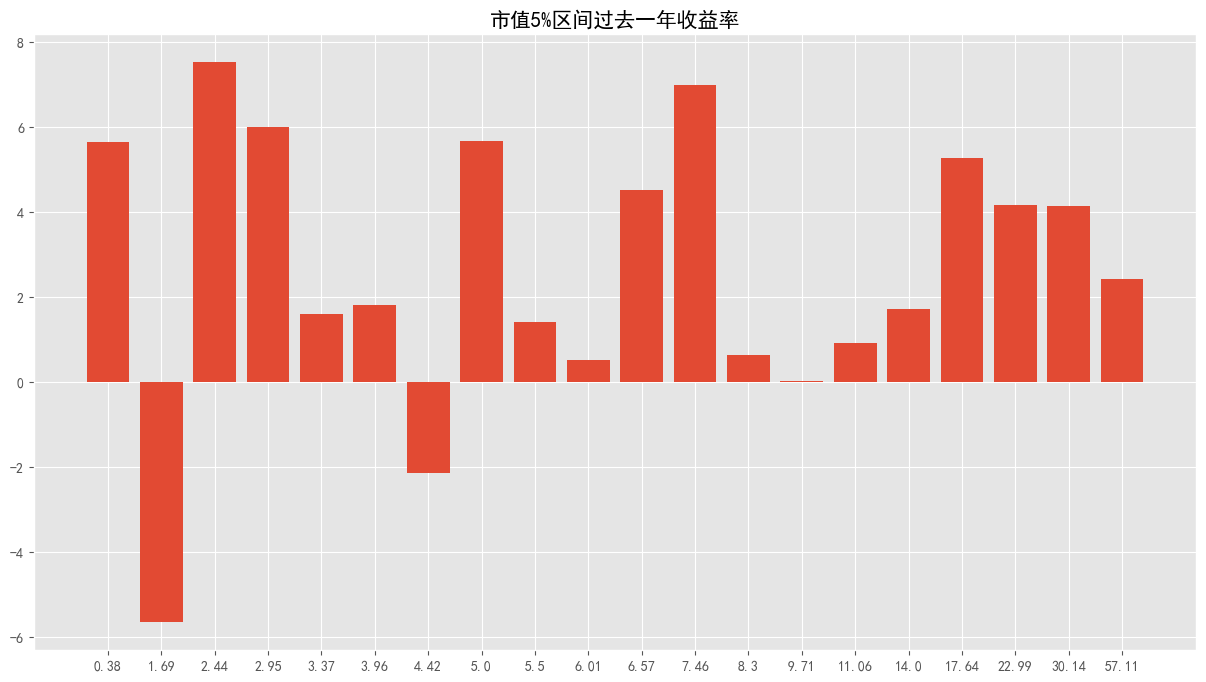

In [14]:

bl_q  = []
i = 0.0
xaxis = []
while i <= 1.0:
    xaxis.append(round(i,2))
    bl_q.append(np.quantile(a=bl_list, q = i))
    print('市值q'+str(round(i,2)))
    print(str(round(np.quantile(a=bl_list, q = i),2)))
    i += 0.05
    i = round(i,2)
    
print(bl_q)
bl_q_txt = [str(round(i,2)) for i in bl_q]
bl_q_txt = bl_q_txt[:-1]
print(xaxis)
xtxt = []
for i in range(len(xaxis)-1):
    xtxt.append('q'+str(xaxis[i]))
print(xtxt)

grp = []


for i in range(len(bl_q)-1):
    one_grp = []
    for cd in past_yr_bl.keys():
        if past_yr_bl[cd] >= bl_q[i] and   past_yr_bl[cd] < bl_q[i+1]:
            one_grp.append(past_yr_profit[cd]*100)

#                 if past_yr_profit[cd]> -0.2:
                

#                 print(cd, DTBS['B'][cd]['cn'], past_yr_profit[cd]*100)
#                 print(one_grp)

                

            
    grp.append(np.mean(one_grp))
    
print(grp)


fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x=bl_q_txt, height=grp)
ax.set_title("市值5%区间过去一年收益率", fontsize=15)

换手率q 0.0
0.17
换手率q 0.05
0.91
换手率q 0.1
1.17
换手率q 0.15
1.53
换手率q 0.2
1.86
换手率q 0.25
2.23
换手率q 0.3
2.63
换手率q 0.35
3.03
换手率q 0.4
3.51
换手率q 0.45
4.62
换手率q 0.5
5.79
换手率q 0.55
7.22
换手率q 0.6
9.01
换手率q 0.65
11.87
换手率q 0.7
14.53
换手率q 0.75
18.71
换手率q 0.8
27.98
换手率q 0.85
39.6
换手率q 0.9
71.21
换手率q 0.95
136.02
换手率q 1.0
577.25
[0.16503565573770493, 0.9085143852459017, 1.1677049180327872, 1.5318893442622947, 1.8644270177492914, 2.233576236826698, 2.6271719672131146, 3.029508647540984, 3.5066355831139053, 4.619551457755362, 5.789972826086958, 7.2248597290702055, 9.01125553675304, 11.867671875000003, 14.527969552998677, 18.712030357142858, 27.97804778688526, 39.60059975409834, 71.21392647540985, 136.0243458606557, 577.2475077868852]
[0.16503565573770493, 0.9085143852459017, 1.1677049180327872, 1.5318893442622947, 1.8644270177492914, 2.233576236826698, 2.6271719672131146, 3.029508647540984, 3.5066355831139053, 4.619551457755362, 5.789972826086958, 7.2248597290702055, 9.01125553675304, 11.867671875000003, 

Text(0.5, 1.0, '换手率5%区间过去一年收益率')

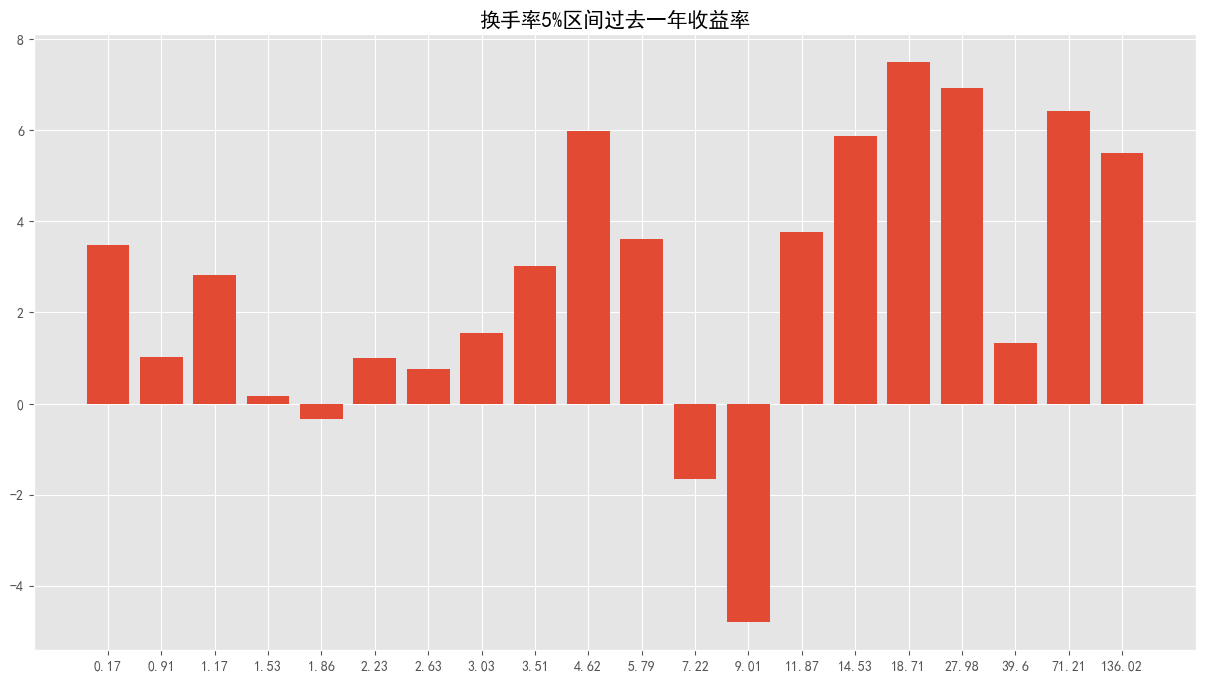

In [15]:

trt_q  = []
i = 0.0
xaxis = []
while i <= 1.0:
    trt_q.append(np.quantile(a=trt_list, q = i))
    print('换手率q',round(i,2))
    print(str(round(np.quantile(a=trt_list, q = i),2)))
    i += 0.05
    i = round(i,2)
    
print(trt_q)

print(trt_q)
trt_q_txt = [str(round(i,2)) for i in trt_q]
trt_q_txt = trt_q_txt[:-1]

print(xaxis)
xtxt = []
for i in range(len(xaxis)-1):
    xtxt.append('q'+str(xaxis[i]) + '-q' + str(xaxis[i+1]))
print(xtxt)

grp = []

for i in range(len(trt_q)-1):
    one_grp = []
    for cd in past_yr_trt.keys():
        if past_yr_trt[cd] >= trt_q[i] and   past_yr_trt[cd] < trt_q[i+1]:
            one_grp.append(past_yr_profit[cd]*100)
    grp.append(np.mean(one_grp))
    
print(grp)

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x=trt_q_txt, height=grp)
ax.set_title("换手率5%区间过去一年收益率", fontsize=15)

In [96]:
past_yr_trt

{'110088.SH': 1.9255253731343283,
 '113545.SH': 2.3505289795918367,
 '113631.SH': 4.131099183673469,
 '123128.SZ': 2.1048661224489793,
 '127061.SZ': 2.1779578260869568,
 '110047.SH': 1.0535171428571428,
 '110063.SH': 1.0222310204081633,
 '110070.SH': 12.982573877551022,
 '110087.SH': 1.2981415384615382,
 '110089.SH': 2.508689763779527,
 '110092.SH': 1.1706387096774193,
 '111001.SH': 0.9706608163265307,
 '113046.SH': 0.8887538775510203,
 '113047.SH': 3.1176714285714286,
 '113058.SH': 1.1722979591836733,
 '113059.SH': 0.9850606334841628,
 '113535.SH': 1.799381632653061,
 '113566.SH': 7.126444897959184,
 '113591.SH': 11.675495510204081,
 '113600.SH': 8.350924897959183,
 '113623.SH': 1.0676448979591835,
 '113632.SH': 1.6596436734693878,
 '113636.SH': 3.86373306122449,
 '113638.SH': 3.8467673469387753,
 '113640.SH': 2.6321036734693872,
 '113641.SH': 1.3397897959183676,
 '113650.SH': 2.372735106382979,
 '113653.SH': 2.8407491017964075,
 '113657.SH': 2.8985224806201546,
 '118000.SH': 3.394128

In [9]:
past_yr_profit

{'110088.SH': -0.0638080134990508,
 '113545.SH': -0.010912119950020845,
 '113631.SH': 0.0822379950928846,
 '123128.SZ': -0.01124694376528123,
 '123156.SZ': 0.11184865582475942,
 '127027.SZ': -0.04497629783790039,
 '127061.SZ': -0.028609745194456762,
 '110047.SH': 0.03664264745129437,
 '110063.SH': 0.03860585044900861,
 '110070.SH': -0.014187834224598992,
 '110087.SH': -0.059516210314127314,
 '110089.SH': 0.0006269592476487974,
 '110092.SH': -0.022823668619330575,
 '111001.SH': -0.04134073513331656,
 '111002.SH': -0.059584465164084964,
 '111003.SH': -0.39540765721087084,
 '111007.SH': -0.023365487674169218,
 '111012.SH': -0.09668828078947185,
 '113025.SH': -0.4371323416653888,
 '113027.SH': -0.01562990067956087,
 '113046.SH': 0.012771585112412658,
 '113047.SH': -0.008062545809919448,
 '113058.SH': 0.10744972577696522,
 '113059.SH': -0.09855901010259217,
 '113064.SH': 0.046906203569089075,
 '113534.SH': 0.21201524437348718,
 '113535.SH': 0.026412876390270297,
 '113566.SH': 0.046566726975

In [ ]:
# DTBS['G'] = dict()
# DTBS['G']['111234.SZ'] = ('2000-01-01','2022-02-04','2022-02-20')

In [46]:
fd = datetime.datetime.strptime('2022-05-09', '%Y-%m-%d').date()
ld = datetime.datetime.strptime('2023-05-09', '%Y-%m-%d').date()

In [47]:
# for key in DTBS['A'].keys():
#     dt = datetime.datetime.strptime(DTBS['B'][key]['dld'], '%Y-%m-%d').date()
#     if dt >= fd and dt <= ld:
#         print(key, DTBS['B'][key]['cn'], DTBS['B'][key]['dld'], DTBS['A'][key][DTBS['B'][key]['dld']]['yl'])



113570.SH 百达转债 2023-03-20 nan
113622.SH 杭叉转债 2023-03-20 nan
123134.SZ 卡倍转债 2023-03-09 4.8027
113011.SH 光大转债(退市) 2023-03-13 0.011
113567.SH 君禾转债 2023-03-09 0.016438356
123105.SZ 拓尔转债 2023-03-02 0.016438356
128145.SZ 日丰转债 2023-02-24 0.016438356
128040.SZ 华通转债 2023-02-23 0.016438356
123060.SZ 苏试转债 2023-01-09 0.010958903999999998
123125.SZ 元力转债 2023-01-03 0.016438356
113525.SH 台华转债 2022-12-30 0.019178082
128029.SZ 太阳转债 2022-12-19 0.010958903999999998
123123.SZ 江丰转债 2022-12-16 0.016438356
128022.SZ 众信转债 2022-12-15 0.016438356
128069.SZ 华森转债 2022-12-12 0.010958903999999998
128015.SZ 久其转债 2022-12-06 0.016438356
110056.SH 亨通转债 2022-11-30 0.016438356
123139.SZ 铂科转债 2022-11-25 0.016438356
123110.SZ 九典转债 2022-11-22 0.016438356
113642.SH 上22转债 2022-11-10 0.016438356
110038.SH 济川转债 2022-11-08 0.016438356
128046.SZ 利尔转债 2022-10-31 0.010958903999999998
128073.SZ 哈尔转债 2022-10-27 0.016438356
123027.SZ 蓝晓转债 2022-10-18 0.016438356
113635.SH 升21转债 2022-09-23 0.016438356
123137.SZ 锦浪转债 2022-09-21 0.0164383

In [5]:
cats = ['交通运输(2021)',
 '钢铁(2021)',
 '石油石化(2021)',
 '煤炭(2021)',
 '有色金属(2021)',
 '家用电器(2021)',
 '医药生物(2021)',
 '基础化工(2021)',
 '轻工制造(2021)',
 '环保(2021)',
 '电力设备(2021)',
 '美容护理(2021)',
 '公用事业(2021)',
 '通信(2021)',
 '非银金融(2021)',
 '传媒(2021)',
 '机械设备(2021)',
 '计算机(2021)',
 '房地产(2021)',
 '银行(2021)',
 '建筑装饰(2021)',
 '社会服务(2021)',
 '电子(2021)',
 '汽车(2021)',
 '农林牧渔(2021)',
 '纺织服饰(2021)',
 '建筑材料(2021)',
 '食品饮料(2021)',
 '国防军工(2021)',
 '商贸零售(2021)']

sw = ['投资', '制造', '服务', '消费']
zs = ['环保', '医药', '周期', '能源', '科技', '消费', '新能源', '金融']
# for cd in DTBS['A'].keys():
#     sw.append(DTBS['B'][cd]['sw'])
#     zs.append(DTBS['B'][cd]['zs'])
    
# sw = list(set(sw))
# zs = list(set(zs))

In [10]:
sw

['投资', '制造', '房地产', '服务', '消费']

In [17]:
oawk = ['2022-10-10',
 '2022-10-17',
 '2022-10-24',
 '2022-10-31',
 '2022-11-07',
 '2022-11-14',
 '2022-11-21',
 '2022-11-28',
 '2022-12-05',
 '2022-12-12',
 '2022-12-19',
 '2022-12-26',
 '2023-01-03',
 '2023-01-09',
 '2023-01-16',
 '2023-01-30',
 '2023-02-06',
 '2023-02-13',
 '2023-02-20',
 '2023-02-27',
 '2023-03-06',
 '2023-03-13',
 '2023-03-20',
 '2023-03-27',
 '2023-04-03',
 '2023-04-10',
 '2023-04-17',
 '2023-04-24',
 '2023-05-04']
# add 2023-01-13 by hand

oamn = ['2022-10-10',
 '2022-11-01',
 '2022-12-01',
 '2023-01-03',
 '2023-02-01',
 '2023-03-01',
 '2023-04-03',
 '2023-05-04']

In [18]:
# DTBS['G'] = dict()
# DTBS['G']['113595.SH'] = ('2000-01-01','2022-02-04','2022-02-20')
# DTBS['G']['113595.SH'] = ('2000-01-01','2022-02-04','2022-02-20')
# DTBS['G']['113595.SH'] = ('2000-01-01','2022-02-04','2022-02-20')
# DTBS['G']['113595.SH'] = ('2000-01-01','2022-02-04','2022-02-20')

In [24]:
tm = oamn.copy()
itv = []
index = DTBS['D']['day'].index('2022-10-10')
for i in range(len(tm)-1):
    flag = 1
    slot = []
    while flag == 1:

        slot.append(DTBS['D']['day'][index])
        index += 1
        if DTBS['D']['day'][index] == tm[i+1]:
            
            flag = 0
            itv.append(slot)
        

    
    

In [25]:

for c in [ '计算机(2021)']:
    print(c)
    av = []
    for interval in itv:
        ov = []
        for t in interval:
            for cd in DTBS['A'].keys():
                if DTBS['B'][cd]['cat1'] == c and DTBS['A'][cd][t]['ia'] == 1 and not np.isnan(DTBS['A'][cd][t]['trt']):
                    ov.append(DTBS['A'][cd][t]['trt'])
                    
        
            
            

        av.append(np.mean(ov))
print(len(itv))

计算机(2021)
7


In [21]:
print(len(av), len(xaxis))

28 0


7 7


Text(0.5, 1.0, '22年10到23年4月计算机行业月平均换手率（热度）')

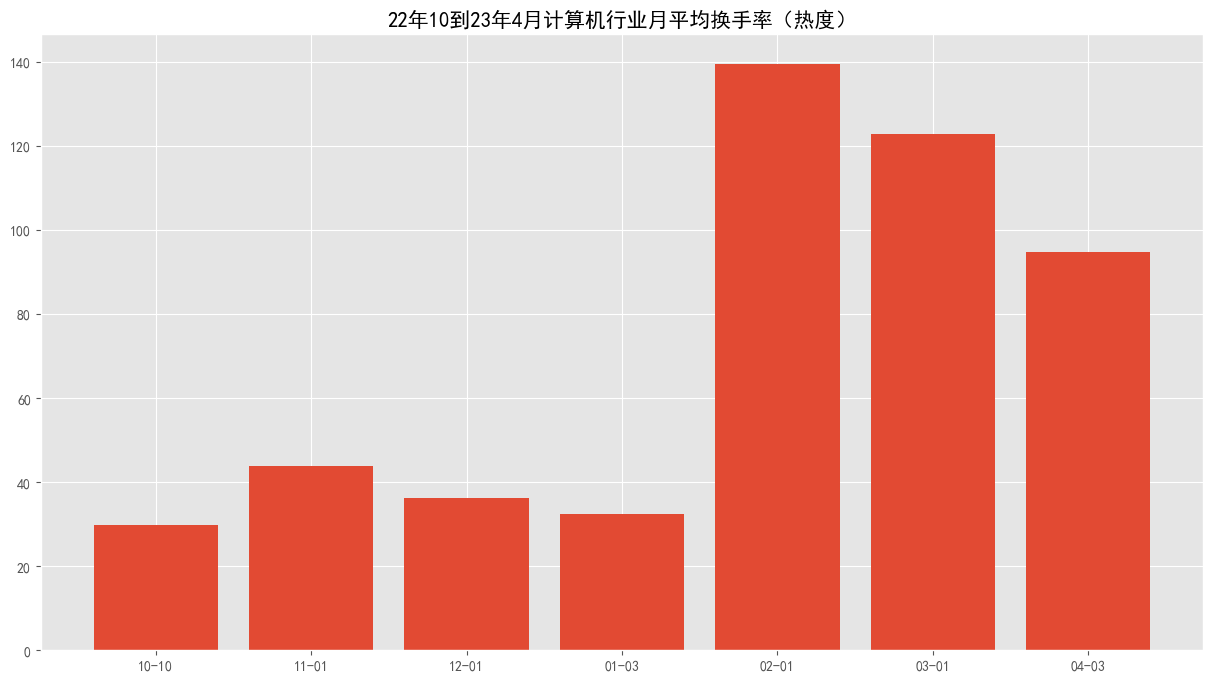

In [28]:
av
xaxis = [i[5:] for i in tm[:-1]]
print(len(av), len(xaxis))
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x=xaxis, height=av)
ax.set_title("22年10到23年4月计算机行业月平均换手率（热度）", fontsize=15)

In [20]:
xaxiss = xaxis[1:]
rl = []
ab = []
for i in range(len(av)-1):
    rl.append((av[i+1] - av[i]) / av[i]*100)
    ab.append(av[i+1] - av[i])

In [132]:
av

[30.49786762285455,
 32.077705399881815,
 23.04528715274544,
 53.78711101750442,
 60.40265131827826,
 43.38562695925,
 34.20127090190832,
 38.153439459866675,
 25.04377008817094,
 8.269479527373914,
 71.59714806287181,
 26.87834083806666,
 23.56131298830208,
 33.705709929583335,
 27.028818633,
 83.6693966475,
 110.33434539758063,
 143.15741121230772,
 163.7448911076923,
 274.2998514821705,
 109.9231208,
 107.24965279999999,
 89.4992,
 58.20352,
 69.3659,
 96.33689922480619,
 96.19190476190477,
 112.3084297520661]

NameError: name 'xaxiss' is not defined

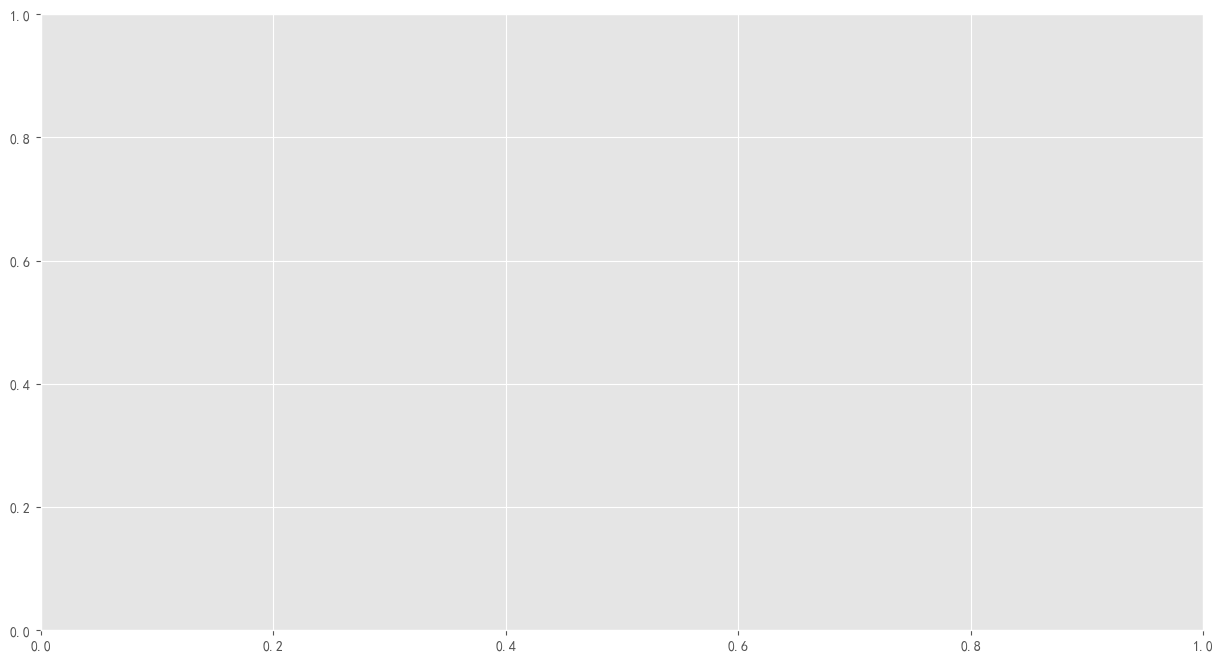

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x=xaxiss, height=rl)
ax.set_title("22年10到23年4月计算机行业月平均换手率变化率（热度）", fontsize=15)

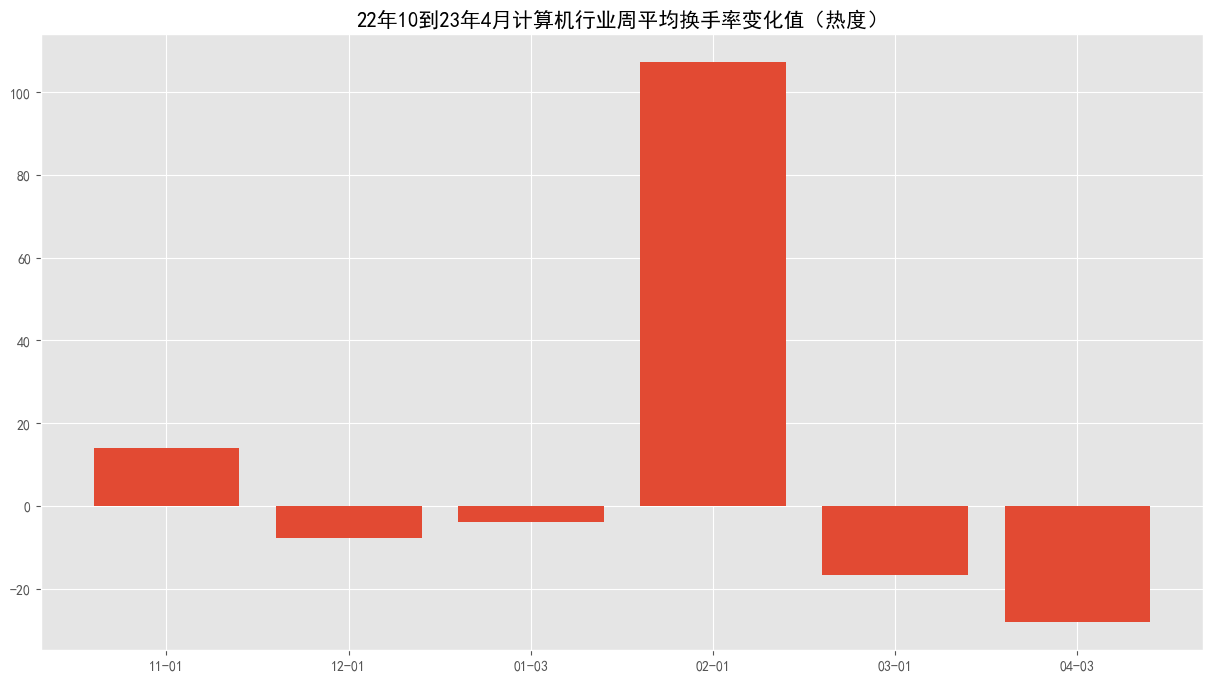

In [144]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x=xaxiss, height=ab)
ax.set_title("22年10到23年4月计算机行业周平均换手率变化值（热度）", fontsize=15)
plt.show()

In [ ]:
# QS

In [ ]:
# 指标对应：
cc = [('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','',''),('','','')]